# Flower Classification

In [1]:
# Imports
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input

# Functions

In [2]:
# Get all data from a directory and return as a dataframe
def get_dataset(folder_path):
    folder = Path(folder_path)

    filepaths = list(folder.glob(r'**/*.jpg'))
    labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

    filepaths = pd.Series(filepaths, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    return pd.concat([filepaths, labels], axis=1)

# Read Directory

In [3]:
# Read images from directory
folder_path = './flowers/'
dataset = get_dataset(folder_path)
dataset

,Filepath,Label
0,flowers\daisy\100080576_f52e8ee070_n.jpg,daisy
1,flowers\daisy\10140303196_b88d3d6cec.jpg,daisy
2,flowers\daisy\10172379554_b296050f82_n.jpg,daisy
3,flowers\daisy\10172567486_2748826a8b.jpg,daisy
4,flowers\daisy\10172636503_21bededa75_n.jpg,daisy
...,...,...
4312,flowers\tulip\9831362123_5aac525a99_n.jpg,tulip
4313,flowers\tulip\9870557734_88eb3b9e3b_n.jpg,tulip
4314,flowers\tulip\9947374414_fdf1d0861c_n.jpg,tulip
4315,flowers\tulip\9947385346_3a8cacea02_n.jpg,tulip


# Classify Image

In [6]:
def predict_images(df, model, class_names, num_images=3):
    # Criar um dicionário para armazenar as previsões
    predictions = {'Image': [], 'Original Label': [], 'Predicted Label': []}

    # Iterar pelas classes
    for class_label in class_names:
        # Filtrar as imagens da classe atual
        class_images = df[df['Label'] == class_label].head(num_images)['Filepath']

        # Iterar pelas imagens da classe atual
        for image_path in class_images:
            # Ler a imagem
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            image = np.expand_dims(image, axis=0)
            image = preprocess_input(image)

            # Fazer a previsão
            predictions['Image'].append(image_path)
            predictions['Original Label'].append(class_label)
            predictions['Predicted Label'].append(class_names[np.argmax(model.predict(image))])

    # Criar um DataFrame com as previsões
    predictions_df = pd.DataFrame(predictions)

    return predictions_df


# Caminho para o arquivo HDF5 do modelo
path_model = './best_model.hdf5'

# Carregar o modelo
model = tf.keras.models.load_model(path_model)

# Lista de nomes de classe
class_names = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

# Fazer previsões para 3 imagens de cada classe
predictions = predict_images(dataset, model, class_names, num_images=3)

# Exibir as previsões
print(predictions)

1/1 [==============================] - 0s 193ms/step
                                             Image Original Label  \
0         flowers\daisy\100080576_f52e8ee070_n.jpg          daisy   
1         flowers\daisy\10140303196_b88d3d6cec.jpg          daisy   
2       flowers\daisy\10172379554_b296050f82_n.jpg          daisy   
3   flowers\dandelion\10043234166_e6dd915111_n.jpg      dandelion   
4   flowers\dandelion\10200780773_c6051a7d71_n.jpg      dandelion   
5   flowers\dandelion\10294487385_92a0676c7d_m.jpg      dandelion   
6        flowers\rose\10090824183_d02c613f10_m.jpg           rose   
7          flowers\rose\102501987_3cdb8e5394_n.jpg           rose   
8          flowers\rose\10503217854_e66a804309.jpg           rose   
9      flowers\sunflower\1008566138_6927679c8a.jpg      sunflower   
10   flowers\sunflower\1022552002_2b93faf9e7_n.jpg      sunflower   
11   flowers\sunflower\1022552036_67d33d5bd8_n.jpg      sunflower   
12        flowers\tulip\100930342_92e8746431_n.jpg

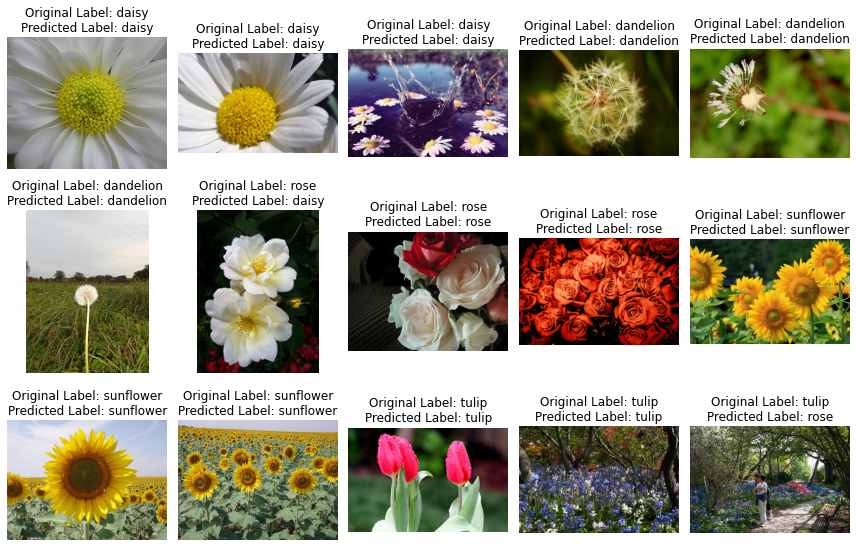

In [5]:
num_rows = 3
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

for idx, row in predictions.iterrows():
    image_path = row['Image']
    original_label = row['Original Label']
    predicted_label = row['Predicted Label']
    
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    
    ax = axes[row_idx, col_idx]
    ax.imshow(image)
    ax.set_title(f'Original Label: {original_label}\nPredicted Label: {predicted_label}')
    ax.axis('off')

plt.tight_layout()
plt.show()